In [1]:
from astrosat import AstroSat
from astrosat import Plot
from astrosat import Parameters
from astrosat import Stars

from astropy.utils.iers import conf
conf.auto_max_age = None


In [2]:
parameters = Parameters("params.yaml")
AS = AstroSat(parameters)
stars = Stars(parameters)

# get satellite positions
# use active satellites and visual objects (rocket bodies)
satTLEs = AS.get_TLEs('ACTIVE')
sats = AS.get_satellites(satTLEs)

satDict = AS.find_intercept_sats(Fmodel=None)

# print satellite dictionary
sat_table = AS.print_satellite_dictionary(satDict)


Output()

Output()

Output()

Name                           Time (UTC)      Duration (s)   Mag (V)   
GALAXY 14 (G-14)               22:16:09        4785.6         14.17     
INTELSAT NEW DAWN              22:16:29        4787.2         14.18     
RADUGA-1M 3                    22:07:13        4787.2         14.17     
IRNSS-1F                       22:17:23        4815.9         14.19     
HYLAS 2                        22:23:58        4789.0         14.18     
TURKSAT 5A                     22:24:32        4786.9         14.18     
XTAR-EUR                       22:32:53        4792.2         14.17     
BADR-6                         22:45:34        4796.5         14.17     
BADR-5                         22:45:55        4787.9         14.17     
SKYNET 5B                      22:50:00        4792.0         14.16     
USA 342                        22:53:28        4789.8         14.17     
ANGOSAT 2                      22:58:41        4787.2         14.16     


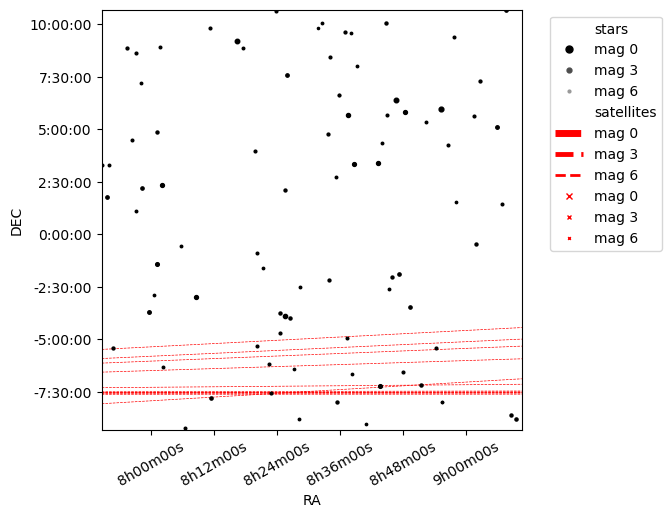

In [3]:
# plot field
plot = Plot(AS, stars)
if len(sat_table)>0:
    plot.plot_satellites(sat_table)
plot.plot_stars()
plot.plot_legend([AS.parameters.Mmin, int(round((AS.parameters.Mmin + AS.parameters.Mmax) / 3.)), 2 * int(round((AS.parameters.Mmin + AS.parameters.Mmax) / 3.))])
plot.make_plot()
plot.save_plot('skyView_%i_%i.png' % (AS.parameters.radius, AS.parameters.date.timestamp()))



In [6]:
sats

{'CALSPHERE 1': <ephem.EarthSatellite 'CALSPHERE 1' at 0x0000014B48B5B840>,
 'CALSPHERE 2': <ephem.EarthSatellite 'CALSPHERE 2' at 0x0000014B48B5B9B0>,
 'LCS 1': <ephem.EarthSatellite 'LCS 1' at 0x0000014B48B5BB20>,
 'TEMPSAT 1': <ephem.EarthSatellite 'TEMPSAT 1' at 0x0000014B48B5BC90>,
 'CALSPHERE 4A': <ephem.EarthSatellite 'CALSPHERE 4A' at 0x0000014B48B5BE00>,
 'OPS 5712 (P/L 160)': <ephem.EarthSatellite 'OPS 5712 (P/L 160)' at 0x0000014B48780030>,
 'LES-5': <ephem.EarthSatellite 'LES-5' at 0x0000014B487801A0>,
 'SURCAL 159': <ephem.EarthSatellite 'SURCAL 159' at 0x0000014B48780310>,
 'OPS 5712 (P/L 153)': <ephem.EarthSatellite 'OPS 5712 (P/L 153)' at 0x0000014B48780480>,
 'SURCAL 150B': <ephem.EarthSatellite 'SURCAL 150B' at 0x0000014B487805F0>,
 'OPS 3811 (DSP 2)': <ephem.EarthSatellite 'OPS 3811 (DSP 2)' at 0x0000014B48780760>,
 'RIGIDSPHERE 2 (LCS 4)': <ephem.EarthSatellite 'RIGIDSPHERE 2 (LCS 4)' at 0x0000014B487808D0>,
 'OSCAR 7 (AO-7)': <ephem.EarthSatellite 'OSCAR 7 (AO-7)' 

In [3]:
from astropy.coordinates import AltAz, SkyCoord
from astropy import units as u
from astropy.coordinates import EarthLocation